# URL Classification

> https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

> https://towardsdatascience.com/naive-bayes-classifier-from-scratch-with-python-942708211470

> https://scikit-learn.org/stable/modules/naive_bayes.html

> https://github.com/japborst/dart_stemmer/blob/master/lib/PorterStemmer.dart

> https://tartarus.org/martin/PorterStemmer/

> https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls

> https://www.kaggle.com/datasets/akashkr/phishing-website-dataset

> https://www.kaggle.com/datasets/sandunabeysooriya/phishing-detection-dataset

> https://www.youtube.com/watch?v=O2L2Uv9pdDA

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
%matplotlib inline

## Data Import and Cleaning

__Properties of interest:__
+ Length
+ Number of dots
+ Number of sub-paths `/`
+ Usage of shortening services
+ Usage of symbols, such as `@`, `?`, `//`
+ Using `http` or `https`
+ Domain (`.gov`, `.com`, etc.)
+ Using IP address
+ Readability?

In [10]:
data = pd.read_csv("./data/phishing_site_urls.csv", encoding="utf-8")
data["Label"].replace(to_replace="bad", value=1, inplace=True)
data["Label"].replace(to_replace="good", value=0, inplace=True)

print(data)

                                                      URL  Label
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...      1
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...      1
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....      1
3       mail.printakid.com/www.online.americanexpress....      1
4       thewhiskeydregs.com/wp-content/themes/widescre...      1
...                                                   ...    ...
549245                                    23.227.196.215/      1
549246                                 apple-checker.org/      1
549247                                  apple-iclods.org/      1
549248                                 apple-uptoday.org/      1
549249                                  apple-search.info      1

[549250 rows x 2 columns]


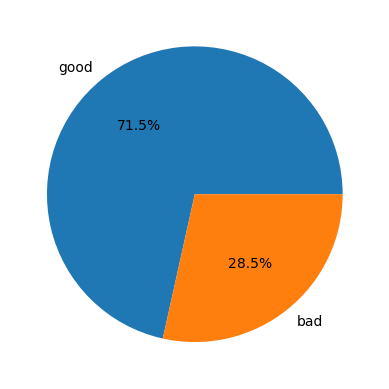

In [3]:
sizes = [data[data["Label"] == 0].shape[0]
        ,data[data["Label"] == 1].shape[0]
        ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=["good", "bad"], autopct='%1.1f%%')
plt.show()

In [15]:
import re

# url_pattern = r"(https?://)?([A-Za-z0-9.\-_]+.[A-Za-z0-9.\-_]{2,3})(/[A-Za-z0-9\/\\\-\.\_\~\:\/\?\#\[\]\@\!\$\&\'\(\)\*\+\,\;\=\%]*)?"
url_pattern = r"(https?://)?([a-z$-.0-_~]+\.[a-zA-Z0-9]{1,4})(/[a-z$-_~]*)?"
url_re = re.compile(url_pattern)

ip_pattern = r"\d{1,3}.\d{1,3}.\d{1,3}.\d{1,3}"
ip_re = re.compile(ip_pattern)


def cleanURL(url: str) -> str:
    if url[0] in ["'", '"']:
        url = url[1:]
    if url[-1] in ["'", '"']:
        url = url[:-2]
    return url


def splitURL(url: str) -> tuple:
    match = url_re.match(url)
    if match == None:
        print(url)
    return match.group(1,2,3) if (match != None) else None


# Return 1 if use https, 0 otherwise
def processHeader(head: str) -> int:
    return int(head == "https://")


# Extract properties of interest from the Address part of the URL
def processAddress(addr: str) -> list:
    if ip_re.match(addr) != None:
        return [1,0,0,0,3] # TODO
    # p1 = # get domain
    p2 = int(addr.find("-") != None) # contains -
    p3 = int(addr.find("_") != None) # contains _
    p4 = int(addr.find(".") != None) # contains .
    return [0, p2, p3, p4]


# Extract properties of interest from the Path part of the URL
def processPath(path: str) -> list:
    if path != None:
        p1 = path.count("/")              # number of sub-paths (/)
        p2 = int(path.find("//") != None) # contains //
        p3 = int(path.find("@") != None)  # contains @
        p4 = path.count("?")              # number of ?
        return [p1, p2, p3, p4]
    return [0,0,0,0]


def processURL(url: str) -> list:
    url = cleanURL(url)
    (h, a, p) = splitURL(url)
    head = processHeader(h)
    addr = processAddress(a)
    path = processPath(p)
    return [len(url), head] + addr + path


print(splitURL(data["URL"].iloc[549245]))

data["Vector"] = data["URL"].map(processURL)
print(data)

(None, '23.227.196.215', '/')
772050312/www1.royalbank.com/cgi-bin/rbaccess/rbunxcgi/


TypeError: cannot unpack non-iterable NoneType object